In [ ]:
from google.colab import files
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Churn_Modelling.csv",encoding='latin1')
print(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data = data.drop(['Surname', 'Geography','Gender'], axis=1)

In [ ]:
x=data.iloc[:,:-1].values
print(x)
y=data.iloc[:,-1].values
print(y)

[[1.0000000e+00 1.5634602e+07 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [2.0000000e+00 1.5647311e+07 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [3.0000000e+00 1.5619304e+07 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [9.9980000e+03 1.5584532e+07 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [9.9990000e+03 1.5682355e+07 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [1.0000000e+04 1.5628319e+07 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]
[1 0 1 ... 1 1 0]


In [ ]:
data.duplicated().sum()

0

<Axes: ylabel='CreditScore'>

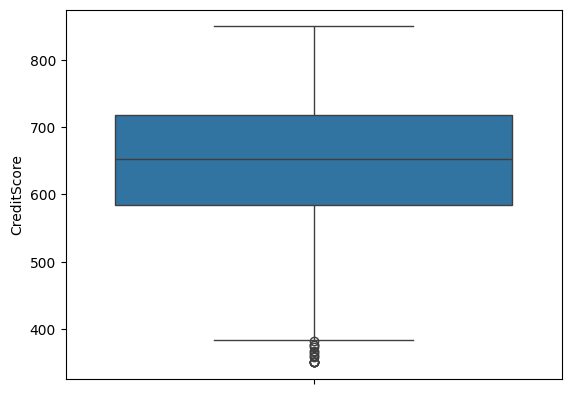

In [ ]:
sns.boxplot(data['CreditScore'])


In [ ]:
scaler = StandardScaler()
data1 = scaler.fit_transform(data)
print(data1)

[[-1.73187761 -0.78321342 -0.32622142 ...  0.97024255  0.02188649
   1.97716468]
 [-1.7315312  -0.60653412 -0.44003595 ...  0.97024255  0.21653375
  -0.50577476]
 [-1.73118479 -0.99588476 -1.53679418 ... -1.03067011  0.2406869
   1.97716468]
 ...
 [ 1.73118479 -1.47928179  0.60498839 ...  0.97024255 -1.00864308
   1.97716468]
 [ 1.7315312  -0.11935577  1.25683526 ... -1.03067011 -0.12523071
   1.97716468]
 [ 1.73187761 -0.87055909  1.46377078 ... -1.03067011 -1.07636976
  -0.50577476]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train)
print(len(X_train))

[[9.2550000e+03 1.5601116e+07 6.8600000e+02 ... 1.0000000e+00
  1.0000000e+00 1.7909326e+05]
 [1.5620000e+03 1.5766374e+07 6.3200000e+02 ... 1.0000000e+00
  1.0000000e+00 1.9597886e+05]
 [1.6710000e+03 1.5716994e+07 5.5900000e+02 ... 1.0000000e+00
  0.0000000e+00 8.5891020e+04]
 ...
 [5.3910000e+03 1.5573851e+07 7.3500000e+02 ... 0.0000000e+00
  0.0000000e+00 9.2220120e+04]
 [8.6100000e+02 1.5807663e+07 6.6700000e+02 ... 1.0000000e+00
  0.0000000e+00 9.7508040e+04]
 [7.2710000e+03 1.5706268e+07 6.9700000e+02 ... 1.0000000e+00
  1.0000000e+00 5.3581140e+04]]
8000


In [ ]:
print(X_test)
print(len(X_test))

[[6.2530000e+03 1.5687492e+07 5.9600000e+02 ... 0.0000000e+00
  0.0000000e+00 4.1788370e+04]
 [4.6850000e+03 1.5736963e+07 6.2300000e+02 ... 1.0000000e+00
  1.0000000e+00 1.4637930e+05]
 [1.7320000e+03 1.5721730e+07 6.0100000e+02 ... 1.0000000e+00
  0.0000000e+00 5.8561310e+04]
 ...
 [7.8540000e+03 1.5746674e+07 7.3000000e+02 ... 1.0000000e+00
  0.0000000e+00 3.3373260e+04]
 [1.0960000e+03 1.5689081e+07 6.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 7.6755990e+04]
 [6.9300000e+03 1.5651627e+07 6.2800000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0767430e+05]]
2000
